# Housing prices Kaggle -> predict prices of houses

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#plt.style.use('seaborn-darkgrid')
import seaborn as sns

## Exploratory Data Analysis (EDA)

In [2]:
# Load data
path_data = os.getcwd()+'/data/'

df_train = pd.read_csv(path_data+'train.csv')
df_test = pd.read_csv(path_data+'test.csv')

df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# See the columns of the dataset
print('Nº of columns: ', len(df_train.columns))
df_train.columns

Nº of columns:  81


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

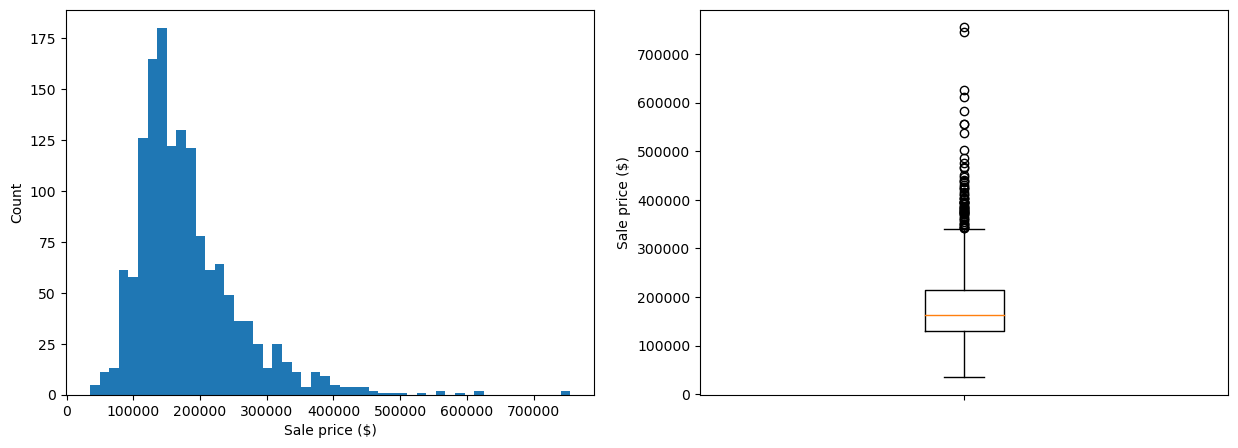

In [4]:
# See the prices, that is to say, the value to predict
fig, axs = plt.subplots(ncols=2, figsize=(15, 5))
axs[0].hist(df_train['SalePrice'], bins=50)
axs[0].set_xlabel('Sale price ($)'), axs[0].set_ylabel('Count')
axs[1].boxplot(df_train['SalePrice'])
axs[1].set_xticklabels(''), axs[1].set_ylabel('Sale price ($)')
plt.show()

In [5]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

In [6]:
# Filter outliers
df_train = df_train[df_train['SalePrice'] < 450000]
df_train.shape

(1446, 81)

In [7]:
#descriptive statistics summary
df_train['SalePrice'].describe()

count      1446.000000
mean     177268.663900
std       69949.609762
min       34900.000000
25%      129900.000000
50%      162000.000000
75%      212000.000000
max      446261.000000
Name: SalePrice, dtype: float64

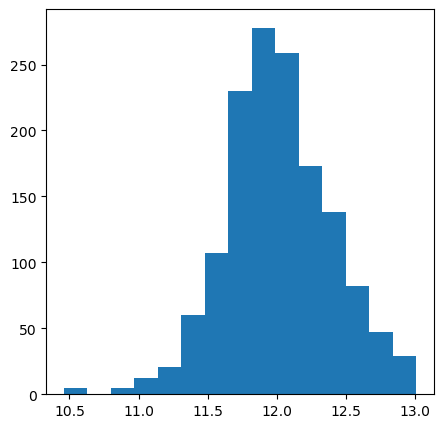

In [8]:
# Convert to a logarithmic scale the Price values
df_train['SalePrice'] = np.log1p(df_train['SalePrice'])

fig, axs = plt.subplots(figsize=(5, 5))
axs.hist(df_train['SalePrice'], bins=15);

<AxesSubplot:xlabel='Nº NaNs'>

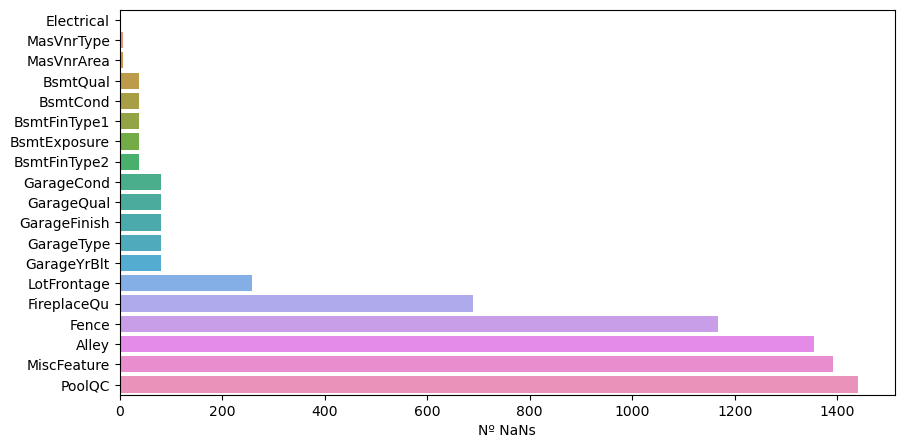

In [9]:
df_nans_count = pd.DataFrame({'Nº NaNs':df_train.isna().astype(int).sum()})
df_nans_count = df_nans_count[df_nans_count['Nº NaNs']!=0]

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(y=df_nans_count.index,
            x="Nº NaNs", data=df_nans_count,
            order=df_nans_count.sort_values('Nº NaNs').index)


In [10]:
cols2drop = df_nans_count[df_nans_count['Nº NaNs'] < 50].sort_values('Nº NaNs').index.to_list()
df_train = df_train.drop(cols2drop, axis=1)

C:\Users\gallegoa\AppData\Local\Temp\ipykernel_19296\1616969255.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = df_train.drop(columns=['Id']).corr()


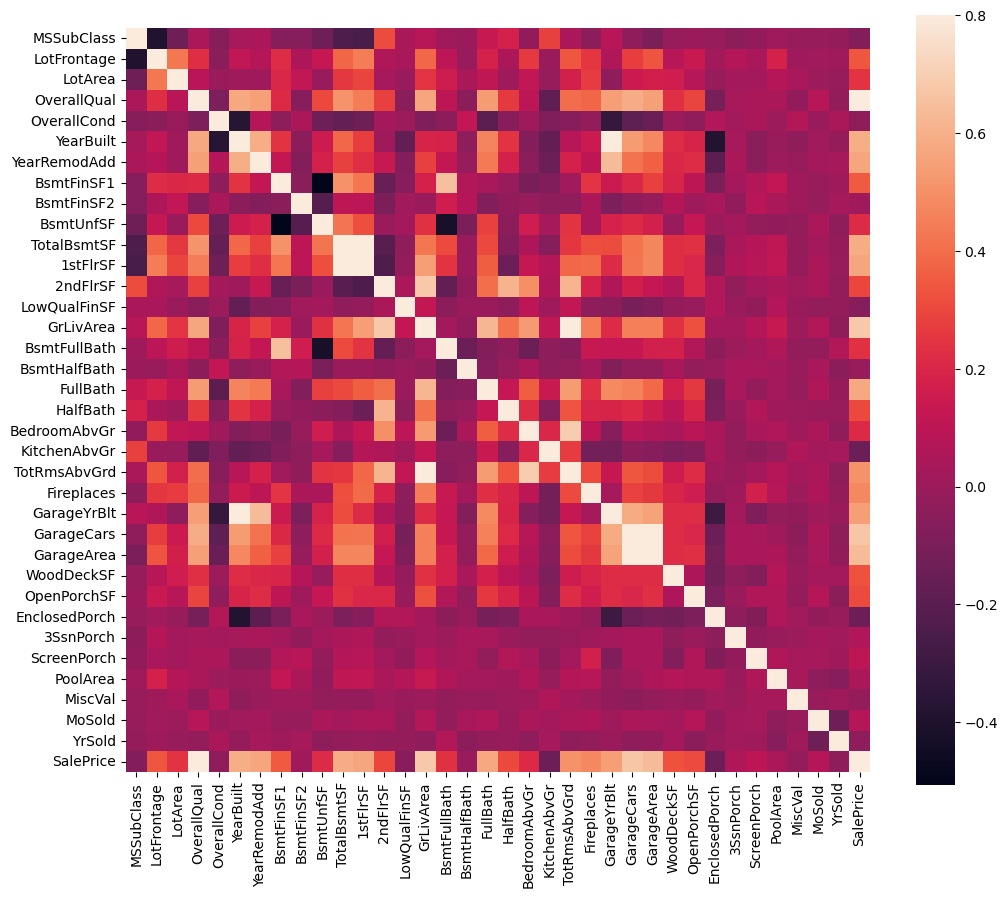

In [11]:
# Plot correlation matrix
corrmat = df_train.drop(columns=['Id']).corr()
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corrmat, vmax=.8, square=True);

In [12]:
# Same columns as v1 notebook
cols = corrmat.nlargest(20, 'SalePrice')['SalePrice'].index.to_list()
print(cols)
print(len(cols))

['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'YearBuilt', 'TotalBsmtSF', 'FullBath', '1stFlrSF', 'YearRemodAdd', 'GarageYrBlt', 'TotRmsAbvGrd', 'Fireplaces', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', 'HalfBath', '2ndFlrSF', 'LotArea']
20


In [13]:
# Clean some columns that are highly related
cols = [col for col in cols if col not in ['GarageArea', '1stFlrSF', 'GarageYrBlt', 'Fireplaces', '2ndFlrSF']]
print('Final columns:', cols)
print(len(cols))

Final columns: ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'YearBuilt', 'TotalBsmtSF', 'FullBath', 'YearRemodAdd', 'TotRmsAbvGrd', 'BsmtFinSF1', 'LotFrontage', 'WoodDeckSF', 'OpenPorchSF', 'HalfBath', 'LotArea']
15


## Preprocess data

To do:
- Convert some numeric data into categorical.
- Scale values.
- Impute values when missing.

In [14]:
# Hereafter we will work only with this 10 columns
df_train = df_train.loc[:, cols]
df_test = df_test.loc[:, cols[1::]] # The test set does not have SalePrice column

In [15]:
# Look for missing data if happens
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1446 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SalePrice     1446 non-null   float64
 1   OverallQual   1446 non-null   int64  
 2   GrLivArea     1446 non-null   int64  
 3   GarageCars    1446 non-null   int64  
 4   YearBuilt     1446 non-null   int64  
 5   TotalBsmtSF   1446 non-null   int64  
 6   FullBath      1446 non-null   int64  
 7   YearRemodAdd  1446 non-null   int64  
 8   TotRmsAbvGrd  1446 non-null   int64  
 9   BsmtFinSF1    1446 non-null   int64  
 10  LotFrontage   1188 non-null   float64
 11  WoodDeckSF    1446 non-null   int64  
 12  OpenPorchSF   1446 non-null   int64  
 13  HalfBath      1446 non-null   int64  
 14  LotArea       1446 non-null   int64  
dtypes: float64(2), int64(13)
memory usage: 180.8 KB


In [16]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   OverallQual   1459 non-null   int64  
 1   GrLivArea     1459 non-null   int64  
 2   GarageCars    1458 non-null   float64
 3   YearBuilt     1459 non-null   int64  
 4   TotalBsmtSF   1458 non-null   float64
 5   FullBath      1459 non-null   int64  
 6   YearRemodAdd  1459 non-null   int64  
 7   TotRmsAbvGrd  1459 non-null   int64  
 8   BsmtFinSF1    1458 non-null   float64
 9   LotFrontage   1232 non-null   float64
 10  WoodDeckSF    1459 non-null   int64  
 11  OpenPorchSF   1459 non-null   int64  
 12  HalfBath      1459 non-null   int64  
 13  LotArea       1459 non-null   int64  
dtypes: float64(4), int64(10)
memory usage: 159.7 KB


In [17]:
from sklearn.preprocessing import StandardScaler

def transform_columns(train, test):
    # Convert to categorical 
    train['OverallQual'] = train['OverallQual'].astype('category')
    test['OverallQual'] = test['OverallQual'].astype('category')

    # Impute values for the nans
    train = train.fillna(value={'LotFrontage':train['LotFrontage'].median()})

    test['GarageCars'] = test['GarageCars'].astype('Int64')
    test = test.fillna(value={'GarageCars':train['GarageCars'].mode()[0],
                            'TotalBsmtSF':train['TotalBsmtSF'].median(),
                            'BsmtFinSF1':train['BsmtFinSF1'].median(),
                            'LotFrontage':train['LotFrontage'].median()
                            }
                        )
    
    # Standardize columns
    name_columns = test.drop(columns=['OverallQual']).columns
    
    for column in name_columns:
        scaler = StandardScaler()
        train[column] = scaler.fit_transform(np.array(train[column]).reshape(-1, 1))
        test[column] = scaler.transform(np.array(test[column]).reshape(-1, 1))
    
    return train, test

df_train, df_test = transform_columns(df_train, df_test)

In [18]:
df_train.head(10)

,SalePrice,OverallQual,GrLivArea,GarageCars,YearBuilt,TotalBsmtSF,FullBath,YearRemodAdd,TotRmsAbvGrd,BsmtFinSF1,LotFrontage,WoodDeckSF,OpenPorchSF,HalfBath,LotArea
0,12.247699,7,0.416779,0.330514,1.061962,-0.449167,0.817064,0.887059,0.957670,0.603863,-0.210960,-0.749452,0.229256,1.239020,-0.199200
1,12.109016,6,-0.476574,0.330514,0.165079,0.503416,0.817064,-0.420620,-0.304098,1.213447,0.476602,1.645251,-0.699200,-0.753886,-0.083317
2,12.317171,7,0.568330,0.330514,0.995526,-0.299006,0.817064,0.838627,-0.304098,0.110817,-0.073448,-0.749452,-0.059935,1.239020,0.082949
3,11.849405,7,0.430738,1.680582,-1.861213,-0.683793,-1.023239,-0.711215,0.326786,-0.494284,-0.440147,-0.749452,-0.166479,-0.753886,-0.088356
4,12.429220,8,1.389896,1.680582,0.962308,0.228904,0.817064,0.741761,1.588554,0.489566,0.659951,0.793444,0.579330,1.239020,0.386260
5,11.870607,5,-0.277165,0.330514,0.729783,-0.589943,-1.023239,0.499599,-0.934982,0.662132,0.705789,-0.428015,-0.242582,1.239020,0.371649
6,12.634606,8,0.384874,0.330514,1.095180,1.498232,0.817064,0.983924,0.326786,2.089723,0.247414,1.299707,0.168374,-0.753886,-0.034546
7,12.206078,7,1.174534,0.330514,0.065425,0.139745,0.817064,-0.565917,0.326786,0.946754,-0.027610,1.138988,2.405800,1.239020,-0.004517
8,11.774528,7,0.544401,0.330514,-1.329727,-0.223925,0.817064,-1.679866,0.957670,-0.978365,-0.852684,-0.026220,-0.699200,-0.753886,-0.433989
9,11.678448,5,-0.845481,-1.019553,-1.063984,-0.132421,-1.023239,-1.679866,-0.934982,0.928825,-0.898522,-0.749452,-0.638317,-0.753886,-0.302991


## Try different ML models

In [19]:
X_train = np.array(df_train.drop(columns=['SalePrice']))
y_train = np.array(df_train['SalePrice'])
X_test = np.array(df_test)

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score, KFold

In [21]:
# Create a list with the models names that we are going to perform
models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    ElasticNet(),
    DecisionTreeRegressor(random_state=42),
    RandomForestRegressor(random_state=42),
    KNeighborsRegressor(),
    XGBRegressor(random_state=42)
]

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

rmse_list = []

# Iterate over models list and fit each model to train set
for model in models:
    # Evaluate the accuracy of each model by using RMSE
    rmse = cross_val_score(model, X_train, y_train, cv=kfold, scoring='neg_root_mean_squared_error')
    rmse = -rmse

    print(f'{type(model).__name__} - RMSE mean: {rmse.mean():.2f} +/- {rmse.std():.2f}')
    # Store the RMSE metrics
    rmse_list.append([rmse.mean(), rmse.std()])

LinearRegression - RMSE mean: 0.17 +/- 0.03
Ridge - RMSE mean: 0.17 +/- 0.03
Lasso - RMSE mean: 0.38 +/- 0.01
ElasticNet - RMSE mean: 0.38 +/- 0.01
DecisionTreeRegressor - RMSE mean: 0.23 +/- 0.01
RandomForestRegressor - RMSE mean: 0.15 +/- 0.01
KNeighborsRegressor - RMSE mean: 0.16 +/- 0.01
XGBRegressor - RMSE mean: 0.15 +/- 0.01


In [22]:
from sklearn.model_selection import GridSearchCV

# Let's tune the best two models which show better performances

# RandomForestRegressor:
model = RandomForestRegressor(random_state=42)

# Hyperparameter definition
params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Fit the hyperparameters by using GridSearchCV
grid_rf = GridSearchCV(model, params, cv=5, n_jobs=-1,
                        scoring="neg_mean_squared_error");
grid_rf.fit(X_train, y_train)

# ==================================================================

# XGBRegressor: 
model = XGBRegressor(random_state=42)

# Hyperparameter definition
params = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [3, 5, 7],
    'n_estimators': [100, 500, 1000],
    'subsample': [0.5, 0.75, 1],
    'colsample_bytree': [0.5, 0.75, 1]
}

# Fit the hyperparameters by using GridSearchCV
grid_xgb = GridSearchCV(model, params, cv=5, n_jobs=-1,
                        scoring="neg_mean_squared_error");
grid_xgb.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, gamma=None, gpu_id=None,
                                    grow_policy=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, m...
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                                    n_jobs=None, num_parallel_tree=None,
                                    predictor=None, random_state=42, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.5, 0.75, 1],
                         'learning_rate': [0.01, 0.1, 0.5],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 500, 1000],
                         'subsample': [0.5, 0.75, 1]},
             scoring='neg_mean_squared_error')

In [23]:
plt.style.use('default')

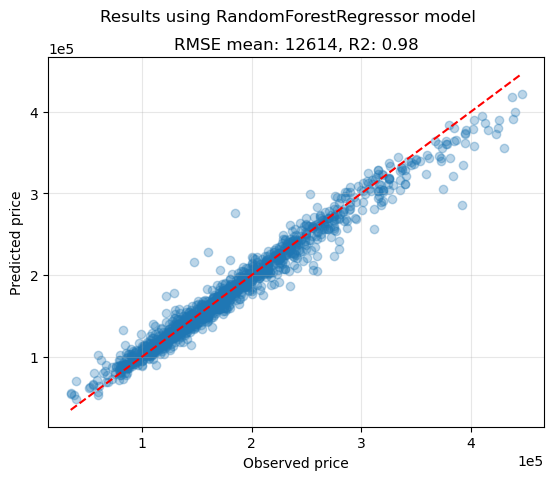

In [24]:
y_pred = np.expm1(grid_rf.predict(X_train))
rmse = np.sqrt(np.mean((np.expm1(y_train) - y_pred)**2))
R2 = np.corrcoef(np.expm1(y_train), y_pred)[0, 1]

fig, ax = plt.subplots()
plt.scatter(np.expm1(y_train), y_pred, alpha=.3)
plt.plot([min(np.expm1(y_train)), max(np.expm1(y_train))], [min(np.expm1(y_train)), max(np.expm1(y_train))], linestyle='--', color='red')
ax.set_xlabel('Observed price'), ax.set_ylabel('Predicted price')
ax.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.title(f'RMSE mean: {int(rmse)}, R2: {np.round(R2, 2)}')
plt.suptitle('Results using RandomForestRegressor model')
plt.grid(alpha=.3)
plt.show()

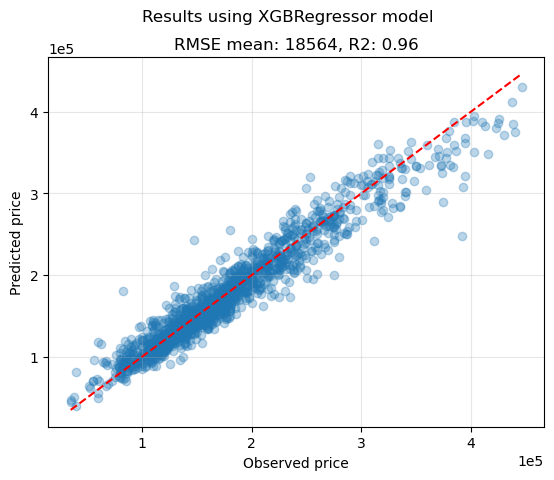

In [25]:
y_pred = np.expm1(grid_xgb.predict(X_train))
rmse = np.sqrt(np.mean((np.expm1(y_train) - y_pred)**2))
R2 = np.corrcoef(np.expm1(y_train), y_pred)[0, 1]

fig, ax = plt.subplots()
plt.scatter(np.expm1(y_train), y_pred, alpha=.3)
plt.plot([min(np.expm1(y_train)), max(np.expm1(y_train))], [min(np.expm1(y_train)), max(np.expm1(y_train))], linestyle='--', color='red')
ax.set_xlabel('Observed price'), ax.set_ylabel('Predicted price')
ax.ticklabel_format(axis='both', style='sci', scilimits=(0, 0))
plt.title(f'RMSE mean: {int(rmse)}, R2: {np.round(R2, 2)}')
plt.suptitle('Results using XGBRegressor model')
plt.grid(alpha=.3)
plt.show()